<a href="https://colab.research.google.com/github/Rafal-Wawrzak/Kaggle_work/blob/main/Neural_Network_Kaggle_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn import set_config
set_config(display='diagram')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#definintions

In [ ]:
def  evalute(y_true, y_pred, class_report=True, matrix=True, color ='Reds'):
    if class_report ==  True:
        report = classification_report(y_true, y_pred)
        print(report)
    if matrix == True:
        confuse = confusion_matrix(y_true, y_pred)
        sns.heatmap(confuse,
                    cmap = color,
                    annot= True,
                    fmt='g'
                    )

In [ ]:
def pipe_quick(transform, classifier):
    pipe = make_pipeline(transform, classifier)
    return pipe

In [ ]:
def printNull(dataFrame):
    '''
    prints the Nulls in a Data Set
    '''
    print(dataFrame.isnull().sum())

In [ ]:
def simple_evalute(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm.ravel()
    TN, FP, FN, TP = cm.ravel()
    print('Accuracy Score: ',(TP+TN)/(TP+TN+FP+FN))
    print('Precision Score: ',TP/(TP+FP))
    print('Recall/Sensitivity Score: ',TP/(TP+FN))
    print('Specificity Score: ',TN/(TN+FP))

In [ ]:
#Fuctions made to look for stuff and less coding down the line
def checkDataframeColum(dataFrame, columnName = True):#WIP:TODO: a lot
    '''
    Will return True if it's a dataframe and the column is in the dataframe
    Other wise it will throw an error.
    '''
    try:
        type(dataFrame) == 'pandas.core.frame.DataFrame'
        return True
    except ValueError:
        print('Wrong DataFrame Type Need to be Panda')


def startUpDatacleaning(dataFrame):
    print('----- Values Types -----')    
    dataFrame.info()
    print('\n\n\n')
    print('----- Null Values -----')
    printNull(dataFrame)
    print('\n\n\n')
    print('----- Group By Data -----')
    grouopByDataFrame(dataFrame)
    print('\n\n\n')
    print('----- Min Max, and Mean -----')
    minMaxMeanDF(dataFrame)

def minMaxMeanDF(dataFrame):
    for i in dataFrame:
        if dataFrame.dtypes[i] == 'int64':
            minMaxMean(dataFrame, i, printOut=True)
        elif dataFrame.dtypes[i] == 'float64':
            minMaxMean(dataFrame, i, printOut=True)

def grouopByDataFrame(dataFrame, printOut = True):
    '''
    This will Print out The DataFrame by Group count, split into Columns
    '''
    for i in dataFrame:
        groupByCount(df, i, printOut)

def groupByCount(dataFrame, columnName =None , printOut = True):
    '''
    Prints out the count of a Column from a dataset  if printOut is ture

    Will Return Value if printOut is False
    '''
    if (printOut == True):
        print((dataFrame.groupby(by = dataFrame[columnName]).count()))
    else:
        return (dataFrame.groupby(by = dataFrame[columnName]).count())

def printNull(dataFrame):
    '''
    prints the Nulls in a Data Set
    '''
    print(dataFrame.isnull().sum())

def minMaxMean(dataFrame, columnName, printOut = False):
    '''
    Returns an array with [ColumnName, Min_Value, Max_Value, Mean_Value]
    '''
    arrayOut = []
    arrayOut.append(columnName)
    arrayOut.append(dataFrame[columnName].min())
    arrayOut.append(dataFrame[columnName].max())
    arrayOut.append(dataFrame[columnName].mean())
    if printOut == True:
        print(arrayOut)
    elif printOut == False:
        return arrayOut

def sumColumn(dataFrame, columnName):
    '''
    This will print out the Nulls in a dataFrame, columnName, and the sums of those
    '''
    print("Is Null     :",dataFrame[columnName].isnull().sum())
    print("Is Not Null :",dataFrame[columnName].count())

def rowsColums(dataFrame):
    '''
    This will print out the rows and colums

    Example out Put:
    > Rows    : 10
    > Columns : 2 
    '''
    print("Rows    : ",len(dataFrame))
    print("Columns : ",len(dataFrame.columns))

        
def pams(getMe):
    try:
        pam = getMe.get_params(deep=False)
        for i in pam:
            print(i,'   :   ', pam[i])
    except AttributeError:
        print("This Object has no attribute to Paramaters")

#Coding Starts

In [ ]:
path = '/content/drive/MyDrive/Boot  Camp/08 Week 8:/Kaggle/train.csv'
test_path = '/content/drive/MyDrive/Boot  Camp/08 Week 8:/Kaggle/test.csv'

df = pd.read_csv(path)
df.head()

testDF = pd.read_csv(test_path)

In [ ]:
checkDataframeColum(path)

True

In [ ]:
page = df.isnull().sum()
print(page)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
##Picking out what i want to look at
train = df[['LotArea',
            'OverallQual',
            'OverallCond',
            'GrLivArea',
            'FullBath',
            'HalfBath',
            'BedroomAbvGr',
            'SalePrice'
            ]]

            

In [ ]:
test = testDF[['LotArea',
               'OverallQual',
               'OverallCond',
               'GrLivArea',
               'FullBath',
               'HalfBath',
               'BedroomAbvGr',
               ]]

In [ ]:
printNull(train)

LotArea         0
OverallQual     0
OverallCond     0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   OverallCond   1460 non-null   int64
 3   GrLivArea     1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   HalfBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   SalePrice     1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


In [ ]:
startUpDatacleaning(train)

----- Values Types -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   OverallCond   1460 non-null   int64
 3   GrLivArea     1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   HalfBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   SalePrice     1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB




----- Null Values -----
LotArea         0
OverallQual     0
OverallCond     0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64




----- Group By Data -----
         Id  MSSubClass  MSZoning  ...  SaleType  SaleCondition  SalePrice
LotArea                            ...                                    
1300      1           1         1  ...         1       

In [ ]:
X= train.drop(columns = 'SalePrice')
y= train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#classifier

In [ ]:
scale = StandardScaler()
ohe = OneHotEncoder(sparse=False,
                    handle_unknown='ignore')

num_select = make_column_selector(dtype_include = 'number')
cat_select = make_column_selector(dtype_include = 'object')

num_tuple  = (scale, num_select)
cat_tuple  = (ohe, cat_select)

col_trans = make_column_transformer(num_tuple,
                                    cat_tuple,
                                    remainder = 'passthrough')

##LinearRegression

In [ ]:
LR = LinearRegression()

In [ ]:
pams(LR)

copy_X    :    True
fit_intercept    :    True
n_jobs    :    None
normalize    :    deprecated
positive    :    False


In [ ]:
LR_pipe = make_pipeline(col_trans,LR)

In [ ]:
%%time
LR_pipe.fit(X_train, y_train)

CPU times: user 12 ms, sys: 997 µs, total: 13 ms
Wall time: 19.7 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f447e17e2d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f447e17edd0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
print('Training accuracy:', LR_pipe.score(X_train, y_train))
print('Testing accuracy:', LR_pipe.score(X_test, y_test))

Training accuracy: 0.7234687492268645
Testing accuracy: 0.7684610165350955


###Deep learning

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_shape = X_train.shape[1]
input_shape

7

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(100,
                input_dim = input_shape, 
                activation = 'relu'))

model.add(Dense(100,
                activation = 'relu'))

model.add(Dense(100,
                activation = 'relu'))

model.add(Dense(1, activation = 'relu'))



In [ ]:
model.compile(loss = 'mse', optimizer = 'adam', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 9ms/step - loss: 39088877568.0000 - mae: 181707.3750 - val_loss: 38877782016.0000 - val_mae: 178529.6719
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 39059701760.0000 - mae: 181634.7812 - val_loss: 38804611072.0000 - val_mae: 178341.9219
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 38869352448.0000 - mae: 181165.2188 - val_loss: 38422192128.0000 - val_mae: 177385.2656
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 38138519552.0000 - mae: 179372.1719 - val_loss: 37171146752.0000 - val_mae: 174289.5000
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 36121092096.0000 - mae: 174406.7344 - val_loss: 34183301120.0000 - val_mae: 166767.0781
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 31881361408.0000 - mae: 163593.1875 - val_loss: 28552880128.0000 - val_mae: 151651.2344
Epoch 7/100
35/35 [===============

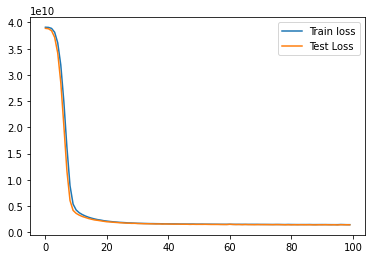

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
type(test)

pandas.core.frame.DataFrame

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1459 non-null   int64
 1   OverallQual   1459 non-null   int64
 2   OverallCond   1459 non-null   int64
 3   GrLivArea     1459 non-null   int64
 4   FullBath      1459 non-null   int64
 5   HalfBath      1459 non-null   int64
 6   BedroomAbvGr  1459 non-null   int64
dtypes: int64(7)
memory usage: 79.9 KB


###Submit

In [ ]:
X_test_test = scaler.transform(test)

In [ ]:
pre = model.predict(X_test_test)

In [ ]:
print(pre)

[[121512.65]
 [155587.61]
 [149763.66]
 ...
 [143823.61]
 [116358.44]
 [227838.08]]


In [ ]:
final_pre = []

for i in pre:
    temp = i
    temp_str = str(temp)
    temp_str = temp_str.replace("[", "")
    temp_str = temp_str.replace(']', '')
    temp_num = float(temp_str)
    final_pre.append(temp_num)


In [ ]:
Fianl_pre = LR_pipe.predict(test)

In [ ]:
print(Fianl_pre)

[118114.51680473 163536.09742152 157897.07066758 ... 121440.10331393
 109875.64243767 235398.27296669]


In [ ]:
type(Fianl_pre)

numpy.ndarray

In [ ]:
OutDF = pd.DataFrame({'Id':testDF['Id'], 'SalePrice': Fianl_pre})


In [ ]:
OutDF.shape[1]

2

In [ ]:
OutDF.head()

,Id,SalePrice
0,1461,118114.516805
1,1462,163536.097422
2,1463,157897.070668
3,1464,184016.190469
4,1465,233566.855263


In [ ]:
OutDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [ ]:
OutDF.to_csv('/content/drive/MyDrive/Boot  Camp/08 Week 8:/Kaggle/Submit.csv', index= False)

In [ ]:
OutDF.to_csv(path_or_buf='kagglesubmission3.csv',index = False)


In [ ]:
type(pre)

numpy.ndarray

In [ ]:
pre_list = pre.tolist()

In [ ]:
type(pre_list)

list

In [ ]:
type(Fianl_pre[1])

numpy.float64

In [ ]:
OutDFtwo = pd.DataFrame({'Id':testDF['Id'], 'SalePrice': final_pre})

In [ ]:
OutDFtwo.head()

,Id,SalePrice
0,1461,121512.65
1,1462,155587.61
2,1463,149763.66
3,1464,173456.66
4,1465,252843.80


In [ ]:
OutDFtwo.to_csv('/content/drive/MyDrive/Boot  Camp/08 Week 8:/Kaggle/SubmitTwo.csv', index= False)